In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install xgboost

In [3]:
!nvidia-smi

Thu Jun 27 21:03:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import f1_score,confusion_matrix
import joblib




In [7]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/upGrad_Capstone_Final/creditcard.csv')

In [8]:
# Display the first few rows of the dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
# Check the shape of the dataset
print(data.shape)

(284807, 31)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
# Check for missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
# Check if there are any duplicate rows
data.duplicated().any()

True

In [13]:
# Count the number of duplicate rows
data.duplicated().sum()

1081

In [14]:
# Drop duplicate rows
data.drop_duplicates(inplace=True)

In [15]:
data.shape

(283726, 31)

In [16]:
# Describe Amount column
data['Amount'].describe()

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

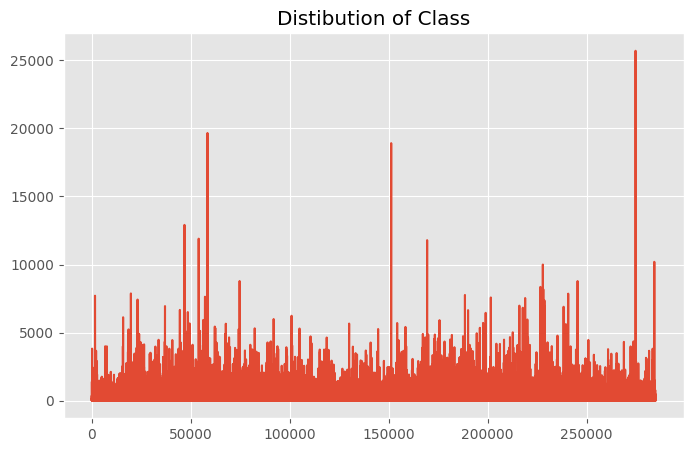

In [17]:
# Plot the Class distribution
with plt.style.context(('ggplot')):
    plt.figure(figsize=(8,5))
    plt.title("Distibution of Class")
    plt.plot(data["Amount"])
    plt.show()

In [18]:
# Feature scaling for 'Amount' column
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [19]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [20]:
data.shape

(283726, 31)

In [21]:
# Separate the data into normal and fraud transactions
Normal = data[data['Class']==0]
Fraud = data[data['Class']==1]

In [22]:
Normal.shape

(283253, 31)

In [23]:
Fraud.shape

(473, 31)

Scenario 1 : Under sampling the majority class

In [24]:
# Sample 473 non-fraudulent transactions to balance the dataset
Normal_sample=Normal.sample(n=473)

In [25]:
Normal_sample.shape

(473, 31)

In [26]:
# Concatenate the sampled normal transactions with the fraudulent transactions
New_data = pd.concat([Normal_sample,Fraud],ignore_index=True)

In [27]:
# Display the class distribution in the new dataset
New_data['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [28]:
New_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1459.0,1.055428,-0.270560,1.357886,1.218039,-1.282969,-0.318301,-0.744705,0.144449,0.885432,...,0.270754,0.677373,-0.106544,0.367521,0.315220,-0.254197,0.060195,0.050646,-0.103166,0
1,113758.0,-2.677941,-0.714044,1.219142,-0.366506,1.353883,-0.757731,1.731580,-1.443019,2.490659,...,-0.663401,0.708879,0.100874,-0.058622,1.365558,-0.179882,-0.770518,-1.179008,-0.277728,0
2,172062.0,-1.876224,2.428233,-1.249949,-1.947576,1.427216,-1.025474,2.187606,-0.947925,1.959069,...,-0.205594,0.814166,-0.236629,0.687932,0.034661,-0.027865,0.773827,-0.027989,-0.350252,0
3,1335.0,-2.290848,-0.724845,3.090715,-0.746779,2.169533,1.975177,2.225272,-3.043153,3.497999,...,-0.396728,1.574634,-0.431065,-0.795598,-1.137964,0.759779,-4.541860,-1.962241,-0.313590,0
4,49573.0,-1.177262,0.575651,0.936369,0.960728,0.579795,0.276768,-0.033602,0.792706,-0.827597,...,0.245270,0.522626,-0.206828,-0.281535,0.042818,-0.177925,0.030856,-0.046028,-0.332760,0


In [29]:
New_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
941,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.204187,1
942,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350292,1
943,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.042263,1
944,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.625112,1
945,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,-0.183478,1


In [30]:
# Split the data into training and testing sets
x = New_data.drop('Class',axis=1)
y = New_data['Class']
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [31]:
# Applying Logistic Regression
model_log1 = LogisticRegression()
model_log1.fit(x_train,y_train)
y_pred_log1 = model_log1.predict(x_test)
print(f"The accuracy of the model is {round(model_log1.score(x_test,y_test)*100,2)}%")
print(f"F1-Score of the model is {round(f1_score(y_test,y_pred_log1),2)}")

The accuracy of the model is 95.26%
F1-Score of the model is 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
# Applying Decision Tree
model_dt1 = DecisionTreeClassifier()
model_dt1.fit(x_train,y_train)
y_pred_dt1 = model_dt1.predict(x_test)
print(f"The accuracy of the model is {round(model_dt1.score(x_test,y_test)*100,2)}%")
print(f"F1-Score of the model is {round(f1_score(y_test,y_pred_dt1),2)}")

The accuracy of the model is 94.21%
F1-Score of the model is 0.94


In [33]:
# Applying Random Forest
model_rf1 = RandomForestClassifier()
model_rf1.fit(x_train,y_train)
y_pred_rf1 = model_rf1.predict(x_test)
print(f"The accuracy of the model is {round(model_rf1.score(x_test,y_test)*100,2)}%")
print(f"F1-Score of the model is {round(f1_score(y_test,y_pred_rf1),2)}")

The accuracy of the model is 95.26%
F1-Score of the model is 0.95


In [34]:
# Applying XG Boost
model_xgb1 = XGBClassifier(max_depth=2)
model_xgb1.fit(x_train,y_train)
y_pred_xgb1 = model_xgb1.predict(x_test)
print(f"The accuracy of the model is {round(model_xgb1.score(x_test,y_test)*100,2)}%")
print(f"F1-Score of the model is {round(f1_score(y_test,y_pred_xgb1),2)}")

The accuracy of the model is 94.74%
F1-Score of the model is 0.95


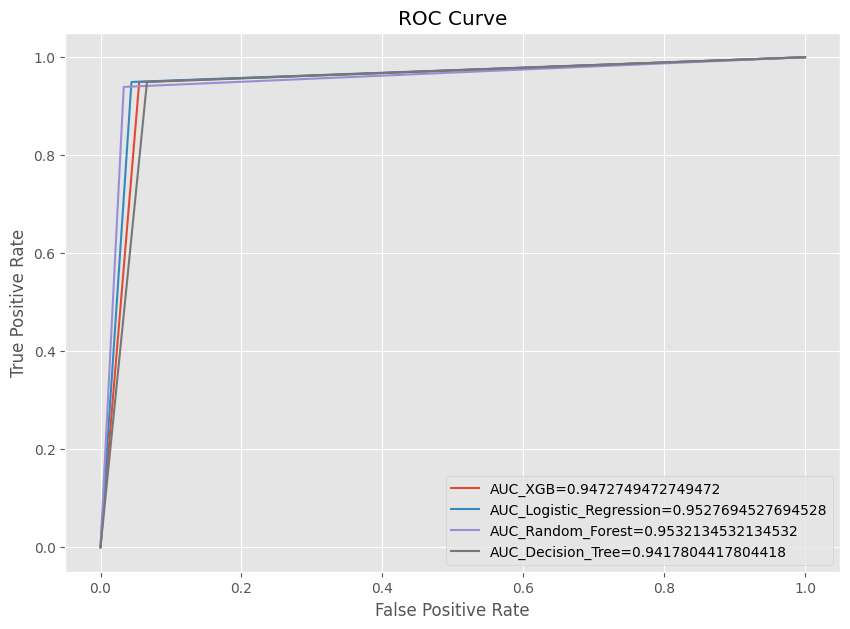

In [35]:
#XG Boost
fpr_xgb1, tpr_xgb1, _ = metrics.roc_curve(y_test,  y_pred_xgb1)
auc_xgb1 = metrics.roc_auc_score(y_test, y_pred_xgb1)
#logistic-regression
fpr_log1, tpr_log1, _ = metrics.roc_curve(y_test,  y_pred_log1)
auc_log1 = metrics.roc_auc_score(y_test, y_pred_log1)
#random-forest
fpr_rf1, tpr_rf1, _ = metrics.roc_curve(y_test,  y_pred_rf1)
auc_rf1 = metrics.roc_auc_score(y_test, y_pred_rf1)
#Decision Tree
fpr_dt1, tpr_dt1, _ = metrics.roc_curve(y_test,  y_pred_dt1)
auc_dt1 = metrics.roc_auc_score(y_test, y_pred_dt1)


with plt.style.context(('ggplot')):
    plt.figure(figsize=(10,7))
    plt.title("ROC Curve")
    plt.plot(fpr_xgb1,tpr_xgb1,label="AUC_XGB="+str(auc_xgb1))
    plt.plot(fpr_log1,tpr_log1,label="AUC_Logistic_Regression="+str(auc_log1))
    plt.plot(fpr_rf1,tpr_rf1,label="AUC_Random_Forest="+str(auc_rf1))
    plt.plot(fpr_dt1,tpr_dt1,label="AUC_Decision_Tree="+str(auc_dt1))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()

Random-Forest performs well in this scenario.

In [36]:
X = data.drop('Class',axis=1)
y = data['Class']

In [37]:
X.shape

(283726, 30)

In [38]:
y.shape

(283726,)

Scenario 2: Over sampling the minority class

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [41]:
y_res.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

In [42]:
# Applying Logistic Regression
model_log2 = LogisticRegression()
model_log2.fit(x_train,y_train)
y_pred_log2 = model_log2.predict(x_test)
print(f"The accuracy of the model is {round(model_log2.score(x_test,y_test)*100,2)}%")
print(f"F1-Score of the model is {round(f1_score(y_test,y_pred_log2),2)}")

The accuracy of the model is 95.26%
F1-Score of the model is 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
# Applying Decision Tree
model_dt2 = DecisionTreeClassifier()
model_dt2.fit(x_train,y_train)
y_pred_dt2 = model_dt2.predict(x_test)
print(f"The accuracy of the model is {round(model_dt2.score(x_test,y_test)*100,2)}%")
print(f"F1-Score of the model is {round(f1_score(y_test,y_pred_dt2),2)}")

The accuracy of the model is 94.21%
F1-Score of the model is 0.94


In [44]:
# Applying Random Forest
model_rf2 = RandomForestClassifier()
model_rf2.fit(x_train,y_train)
y_pred_rf2 = model_rf2.predict(x_test)
print(f"The accuracy of the model is {round(model_rf2.score(x_test,y_test)*100,2)}%")
print(f"F1-Score of the model is {round(f1_score(y_test,y_pred_rf2),2)}")

The accuracy of the model is 95.26%
F1-Score of the model is 0.95


In [45]:
# Applying XG Boost
model_xgb2 = XGBClassifier(max_depth=2)
model_xgb2.fit(x_train,y_train)
y_pred_xgb2 = model_xgb2.predict(x_test)
print(f"The accuracy of the model is {round(model_xgb2.score(x_test,y_test)*100,2)}%")
print(f"F1-Score of the model is {round(f1_score(y_test,y_pred_xgb2),2)}")

The accuracy of the model is 94.74%
F1-Score of the model is 0.95


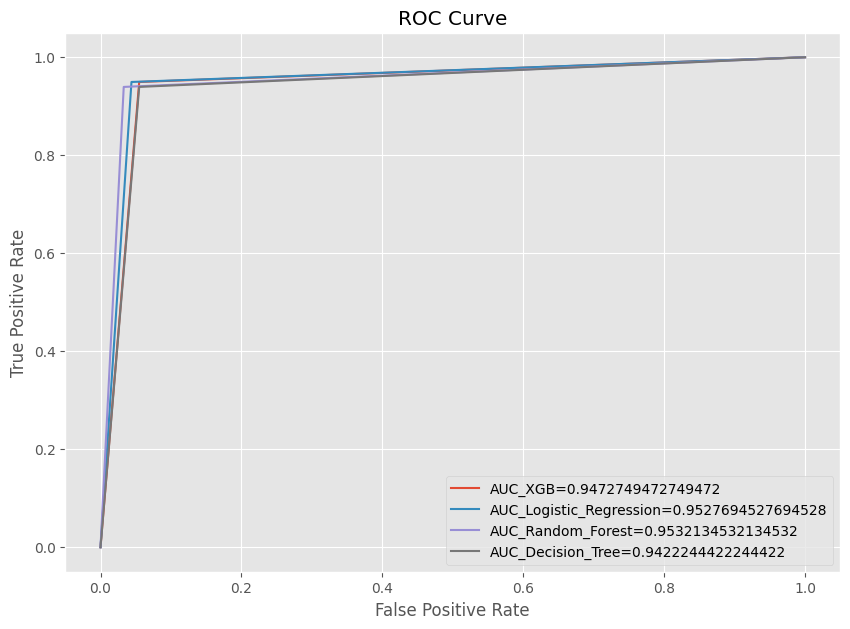

In [46]:
#xgbbost
fpr_xgb2, tpr_xgb2, _ = metrics.roc_curve(y_test,  y_pred_xgb2)
auc_xgb2 = metrics.roc_auc_score(y_test, y_pred_xgb2)
#logistic-regression
fpr_log2, tpr_log2, _ = metrics.roc_curve(y_test,  y_pred_log2)
auc_log2 = metrics.roc_auc_score(y_test, y_pred_log2)
#random-forest
fpr_rf2, tpr_rf2, _ = metrics.roc_curve(y_test,  y_pred_rf2)
auc_rf2 = metrics.roc_auc_score(y_test, y_pred_rf2)
#Decision-Tree
fpr_dt2, tpr_dt2, _ = metrics.roc_curve(y_test,  y_pred_dt2)
auc_dt2 = metrics.roc_auc_score(y_test, y_pred_dt2)


with plt.style.context(('ggplot')):
    plt.figure(figsize=(10,7))
    plt.title("ROC Curve")
    plt.plot(fpr_xgb2,tpr_xgb2,label="AUC_XGB="+str(auc_xgb2))
    plt.plot(fpr_log2,tpr_log2,label="AUC_Logistic_Regression="+str(auc_log2))
    plt.plot(fpr_rf2,tpr_rf2,label="AUC_Random_Forest="+str(auc_rf2))
    plt.plot(fpr_dt2,tpr_dt2,label="AUC_Decision_Tree="+str(auc_dt2))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()

Random-Forest performs well in this scenario.

We have found that Random-Forest model performs well in both the scenarios. Therefore Random-Forest model is used to solve this problem.

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from scipy.stats import randint

# Define the parameter distribution for hyperparameter tuning
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}


# Initialize RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(estimator=model_rf1, param_distributions=param_dist,
                                   n_iter=50, cv=5, n_jobs=-1, scoring='f1', random_state=42, verbose=2)

# Perform the random search on the training data
random_search.fit(x_train, y_train)

# Print the best parameters found by the random search
print(f"Best parameters found: {random_search.best_params_}")

# Use the best estimator to make predictions on the test data
best_rf = random_search.best_estimator_
y_pred_rf = best_rf.predict(x_test)

# Calculate and print the accuracy of the best model
accuracy_rf = best_rf.score(x_test, y_test)
print(f"The accuracy of the best Random Forest model is {round(accuracy_rf * 100, 2)}%")

# Calculate and print the F1-score of the best model
f1_rf = f1_score(y_test, y_pred_rf)
print(f"F1-Score of the best Random Forest model is {round(f1_rf, 2)}")




Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 191}
The accuracy of the best Random Forest model is 95.26%
F1-Score of the best Random Forest model is 0.95


In [48]:
# Save the trained Random Forest model to a file
joblib_file = "Random_forest_model.pkl"
joblib.dump(model_rf1, joblib_file)
print(f"Model saved to {joblib_file}")

Model saved to Random_forest_model.pkl
